In [211]:
import os
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import scipy.stats as ss
from scipy import stats
plt.style.use('ggplot')

In [3]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [4]:
data = pd.read_csv('./UFC Data/data1.csv')
fighter_data = pd.read_csv('./UFC Data/raw_fighter_data1.csv')
betting_data = pd.read_csv('./UFC Data/betting_data.csv')

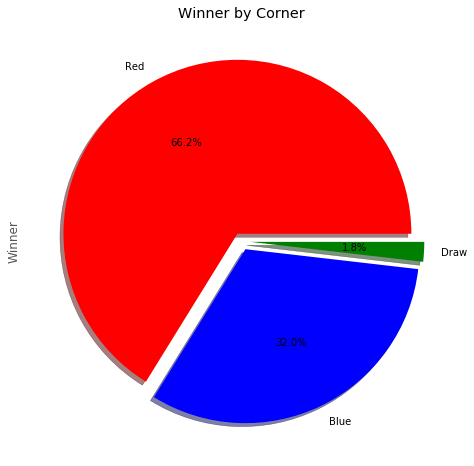

In [5]:
colors = ['red', 'blue', 'green']
plt.figure(figsize=(15,8))
P=data['Winner'].value_counts()[:10].plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',colors=colors,shadow=True)
plt.title('Winner by Corner')
P

In [336]:
import datetime
data.loc[:,'date'] = data['date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d'))
data_modern = data.loc[data['date'] > datetime.datetime(2010,1,1)]

### Why 2010? Major UFC personalities would be gaining in popularity. Stats recordings would become more advacned, and in 2011 the UFC would sign a partnership with Fox, allowing the company to gain more legitimacy and have access to more financial and logistical resources. The sport has become "Mainstream"

In [337]:
recent_wins = data_modern.copy()

In [338]:
blue_wins = sum(recent_wins['Winner'] == 'Blue')
red_wins = sum(recent_wins['Winner'] == 'Red')
draw_wins = sum(recent_wins['Winner'] == 'Draw')

### Using data after 1/1/2010, we can see that the Red Side win rate drops to 58.3%. Closer to even, yet still an advantage over Blue Side

In [339]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, 'Percent')

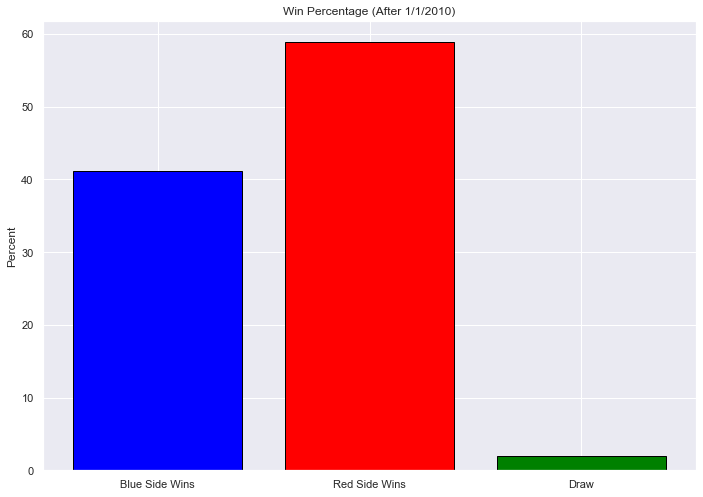

In [43]:
x_labels = ('Blue Side Wins', 'Red Side Wins', 'Draw') 
y_pos = np.arange(len(x_labels)) 
wins = ((blue_wins / (blue_wins + red_wins))*100, (red_wins / (blue_wins + red_wins))*100, (draw_wins / (blue_wins + red_wins))*100) 
plt.bar(y_pos, wins, align='center', color=['blue', 'red', 'green'], edgecolor='black') 
plt.xticks(y_pos, x_labels)
plt.title("Win Percentage (After 1/1/2010)")
plt.ylabel("Percent")


In [ ]:
blue_wins = sum(recent_wins[['Winner','tile_bout']] == 'Blue')
red_wins = sum(recent_wins['Winner'] == 'Red')
draw_wins = sum(recent_wins['Winner'] == 'Draw')

### This indicates that more championship bouts have been won or retained by the Red Side, this may be the contributing factor to the higher winrrate on Red Side. 

Red     158
Blue     69
Draw      4
Name: Winner, dtype: int64

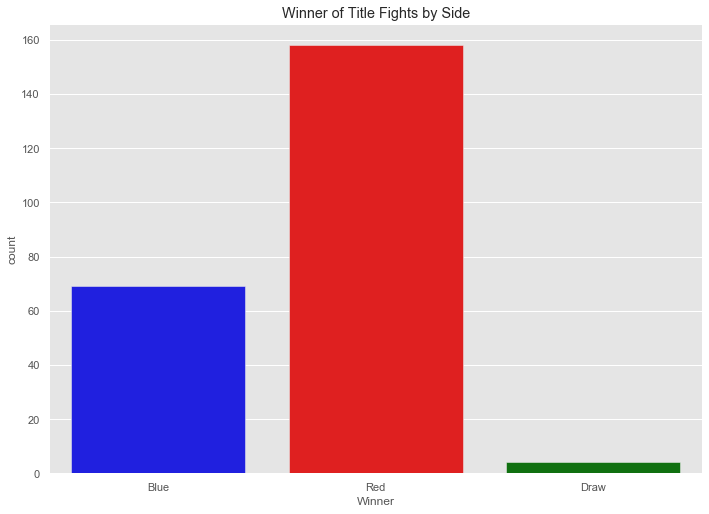

In [196]:
ax = data_modern['Winner'][data_modern['title_bout']== True]
sns.countplot(ax, palette = ['Blue', 'Red', 'Green'])
blue, red, draw = ax.value_counts()
plt.title("Winner of Title Fights by Side")
data_modern['Winner'][data_modern['title_bout']].value_counts()

In [203]:
quotient = 69/231
percentage = quotient * 100
print("Blue Percentage Wins of Title Fights is", percentage)

Blue Percentage Wins of Title Fights is 29.87012987012987


In [207]:
quotient = 158/231
percentage = quotient * 100
print("Red Percentage Wins of Title Fights is", percentage)

Red Percentage Wins of Title Fights is 68.3982683982684


In [206]:
quotient = 4/231
percentage = quotient * 100
print("Draw Percentage Wins of Title Fights is", percentage)

Draw Percentage Wins of Title Fights is 1.7316017316017316


## Here are the amount of title fights vs regular fights that have occured in the UFC using recent data.

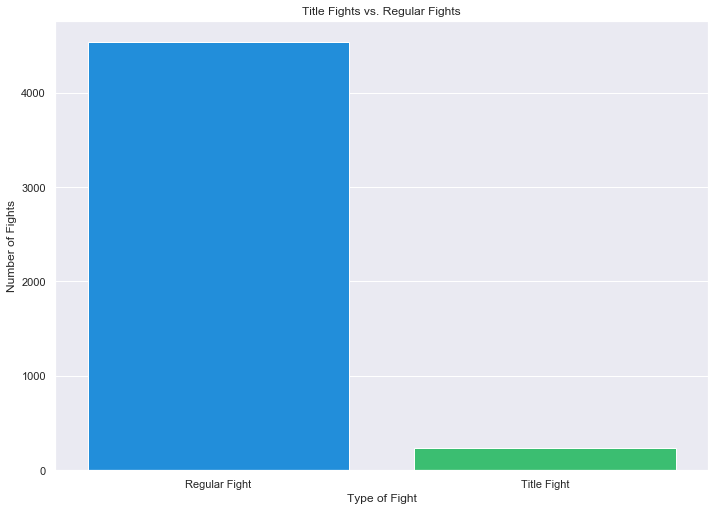

False    4537
True      231
Name: title_bout, dtype: int64

In [346]:
sns.set_palette("terrain") 
g = sns.countplot(x="title_bout", data=data_modern)
g.set_xticks([0,1])
g.set_xticklabels(['Regular Fight','Title Fight'])
g.set(xlabel="Type of Fight",ylabel="Number of Fights")
plt.title("Title Fights vs. Regular Fights")
plt.show()
data_modern['title_bout'].value_counts()

#### The number of title fights won by red side and the total number of title fights that have occured compared to regular fights is not big enough to cause the discrepancy in red side wins

### Levene and T-Test to test the equality of variances and unequal variances respectively 

In [228]:
ss.levene(data_modern.loc[data_modern['Winner'] == 'Blue', 'title_bout'],
          data_modern.loc[data_modern['Winner'] == 'Red', 'title_bout'], center='mean')

LeveneResult(statistic=49.99625769769318, pvalue=1.8667498630816718e-12)

In [229]:
ss.ttest_ind(data_modern.loc[data_modern['Winner'] == 'Blue', 'title_bout'],
          data_modern.loc[data_modern['Winner'] == 'Red', 'title_bout'], equal_var = True)

Ttest_indResult(statistic=-3.4947889004870225, pvalue=0.00048059111360556657)

In [51]:
# sns.set_palette("RdBu")
# fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
# fig.s uptitle("Title Fights vs. Regular Fights")
# sns.countplot(x="title_bout", data=recentwins, ax=ax)
# ax.set(xlabel="Title or Regular",ylabel="Number of Fights")
# fig.set_xticks([0,1])
# fig.set_xticklabels(['Regular Fight','Title Fight'])
# plt.axes.Axes.Bar(xtick_label=["Regular Fight","Title Fight"])
# plt.show()

### Are there any significant differences in win rates with fighter age, height and reach?

In [241]:
data_modernheight = data_modern.copy()
pd.options.mode.chained_assignment = None

In [242]:
data_modernheight['R_Height_cms'] = data_modernheight['R_Height_cms'].fillna(data_modernheight['R_Height_cms'].mean())

In [243]:
data_modernheight['B_Height_cms'] = data_modernheight['B_Height_cms'].fillna(data_modernheight['B_Height_cms'].mean())

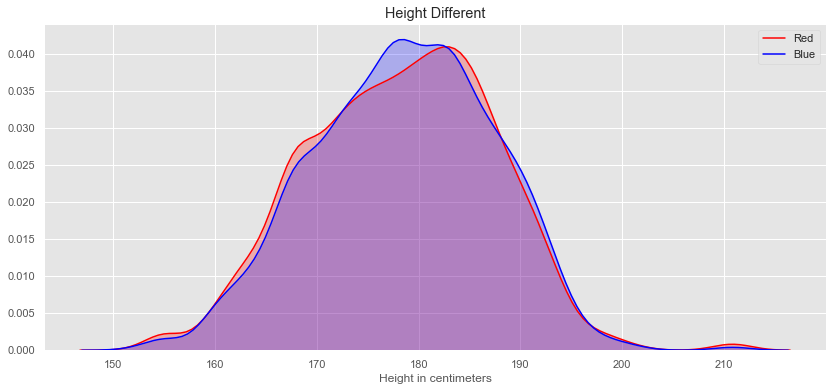

In [244]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(data_modernheight.R_Height_cms, shade=True, color='red', label='Red')
sns.kdeplot(data_modernheight.B_Height_cms, shade=True, color='blue', label='Blue')
plt.xlabel('Height in centimeters')
plt.title('Height Different')

plt.show()

In [47]:
data_modernreach = data_modern.copy()

In [48]:
data_modernreach['R_Reach_cms'] = data_modernreach['R_Reach_cms'].fillna(data_modernreach['R_Reach_cms'].mean())

In [49]:
data_modernreach['B_Reach_cms'] = data_modernreach['B_Reach_cms'].fillna(data_modernreach['B_Reach_cms'].mean())

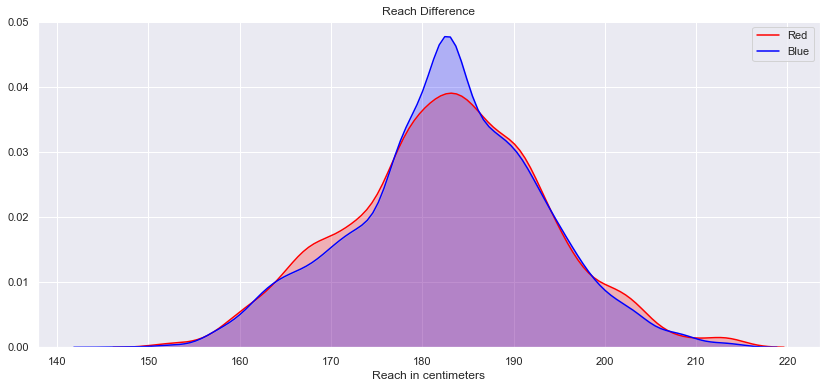

In [50]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(data_modernreach.R_Reach_cms, shade=True, color='red', label='Red')
sns.kdeplot(data_modernreach.B_Reach_cms, shade=True, color='blue', label='Blue')
plt.xlabel('Reach in centimeters')
plt.ylabel('')
plt.title('Reach Difference')

plt.show()

In [51]:
data_modernage = data_modern.copy()

In [54]:
data_modernage['R_age'] = data_modernage['R_age'].fillna(data_modernage['R_age'].mean())

In [55]:
data_modernage['B_age'] = data_modernage['B_age'].fillna(data_modernage['B_age'].mean())

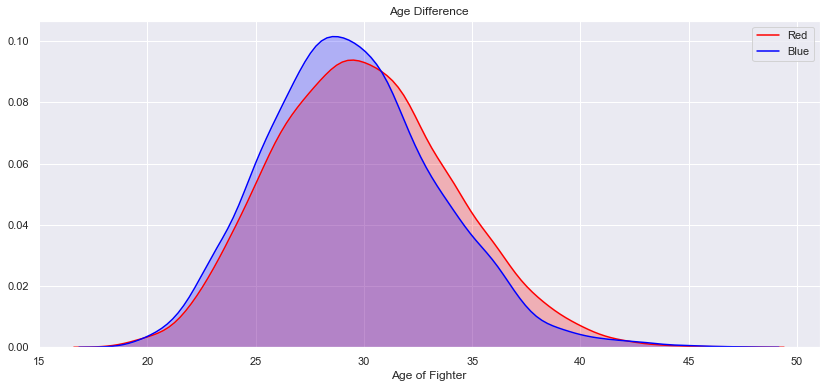

In [56]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(data_modernage.R_age, shade=True, color='red', label='Red')
sns.kdeplot(data_modernage.B_age, shade=True, color='blue', label='Blue')
plt.xlabel('Age of Fighter')
plt.ylabel('')
plt.title('Age Difference')

plt.show()

#### Blue fighters had a longer reach while red fighters are slightly older, height is similar. With minimal differences of height, age and reach contributing to the variation of side win rates, there has to be another variable in play that gives Red Side the advantage.

### Looking at stance winrate by side to see if stance plays a role in side outcome

In [135]:
stances = recent_wins[['B_Stance','R_Stance','Winner']]
blue_winner_stance = pd.DataFrame(stances.loc[stances['Winner'] == 'Blue'][['B_Stance','R_Stance','Winner']]['B_Stance'].value_counts())
blue_winner_stance = blue_winner_stance.reset_index()
blue_winner_stance.columns = ['Stance','Number of Blue Fighters']
red_winner_stance = pd.DataFrame(stances.loc[stances['Winner'] == 'Red'][['B_Stance','R_Stance','Winner']]['R_Stance'].value_counts())
red_winner_stance = red_winner_stance.reset_index()
red_winner_stance.columns = ['Stance','Number of Red Fighters']

In [136]:
blue_winner_stance.loc[:,'Percentage'] = blue_winner_stance['Number of Blue Fighters']/np.sum(blue_winner_stance['Number of Blue Fighters'])
blue_winner_stance

,Stance,Number of Blue Fighters,Percentage
0,Orthodox,1432,0.745445
1,Southpaw,398,0.207184
2,Switch,90,0.046851
3,Open Stance,1,0.000521


In [137]:
red_winner_stance.loc[:,'Percentage'] = red_winner_stance['Number of Red Fighters']/np.sum(red_winner_stance['Number of Red Fighters'])
red_winner_stance

,Stance,Number of Red Fighters,Percentage
0,Orthodox,2054,0.748542
1,Southpaw,591,0.215379
2,Switch,97,0.035350
3,Open Stance,2,0.000729


In [144]:
fig = px.pie(red_winner_stance, values='Percentage', names='Stance', title='Stance Win Percentage on Red Side')
fig.show()

In [139]:
fig = px.pie(blue_winner_stance, values='Percentage', names='Stance', title='Stance Win Percentage on Blue Side')
fig.show()

### No major discrepancies between red side and blue side winrates when it comes to stance. 

### Looking at four of the most acomplished fighters in the UFC: Jon Jones, Anderson Silva, Georges St-Pierre and Demetrious Johnson. What's the amount of their title defenses on red side? 

In [117]:
jon = data_modern[(data_modern.R_fighter == "Jon Jones") | (data_modern.B_fighter == "Jon Jones")][["R_fighter","B_fighter",'Winner','title_bout']]
jon

,R_fighter,B_fighter,Winner,title_bout
542,Jon Jones,Dominick Reyes,Red,True
834,Jon Jones,Thiago Santos,Red,True
1017,Jon Jones,Anthony Smith,Red,True
1090,Jon Jones,Alexander Gustafsson,Red,True
1761,Daniel Cormier,Jon Jones,Draw,True
2381,Jon Jones,Ovince Saint Preux,Red,True
2979,Jon Jones,Daniel Cormier,Red,True
3337,Jon Jones,Glover Teixeira,Red,True
3606,Jon Jones,Alexander Gustafsson,Red,True
3747,Jon Jones,Chael Sonnen,Red,True


In [59]:
anderson = data_modern[(data_modern.R_fighter == "Anderson Silva") | (data_modern.B_fighter == "Anderson Silva")][["R_fighter","B_fighter",'Winner','title_bout']]
anderson

,R_fighter,B_fighter,Winner,title_bout
193,Uriah Hall,Anderson Silva,Red,False
904,Jared Cannonier,Anderson Silva,Red,False
1057,Israel Adesanya,Anderson Silva,Red,False
1978,Anderson Silva,Derek Brunson,Red,False
2282,Daniel Cormier,Anderson Silva,Red,False
2438,Anderson Silva,Michael Bisping,Blue,False
2944,Anderson Silva,Nick Diaz,Draw,False
3492,Chris Weidman,Anderson Silva,Red,True
3691,Anderson Silva,Chris Weidman,Blue,True
3943,Anderson Silva,Stephan Bonnar,Red,False


In [68]:
georges = data_modern[(data_modern.R_fighter == "Georges St-Pierre") | (data_modern.B_fighter == "Georges St-Pierre")][["R_fighter","B_fighter",'Winner','title_bout']]
georges

,R_fighter,B_fighter,Winner,title_bout
1665,Michael Bisping,Georges St-Pierre,Blue,True
3532,Georges St-Pierre,Johny Hendricks,Red,True
3800,Georges St-Pierre,Nick Diaz,Red,True
3924,Georges St-Pierre,Carlos Condit,Red,True
4426,Georges St-Pierre,Jake Shields,Red,True
4521,Georges St-Pierre,Josh Koscheck,Red,True
4711,Georges St-Pierre,Dan Hardy,Red,True


In [83]:
Demetrious = data_modern[(data_modern.R_fighter == "Demetrious Johnson") | (data_modern.B_fighter == "Demetrious Johnson")][["R_fighter","B_fighter",'Winner','title_bout']]
Demetrious

,R_fighter,B_fighter,Winner,title_bout
1283,Demetrious Johnson,Henry Cejudo,Blue,True
1697,Demetrious Johnson,Ray Borg,Red,True
1902,Demetrious Johnson,Wilson Reis,Red,True
2069,Demetrious Johnson,Tim Elliott,Red,True
2382,Demetrious Johnson,Henry Cejudo,Red,True
2645,Demetrious Johnson,John Dodson,Red,True
2838,Demetrious Johnson,Kyoji Horiguchi,Red,True
3114,Demetrious Johnson,Chris Cariaso,Red,True
3267,Demetrious Johnson,Ali Bagautinov,Red,True
3499,Demetrious Johnson,Joseph Benavidez,Red,True


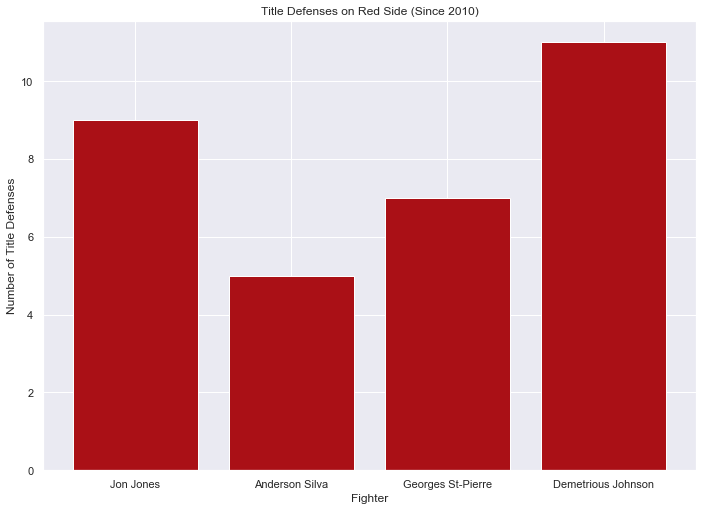

In [118]:
sns.set_palette("Reds_r") 
Wins = [9,5,7,11]
Fighter = ['Jon Jones','Anderson Silva','Georges St-Pierre','Demetrious Johnson']

plt.bar(Fighter, Wins)
plt.title('Title Defenses on Red Side (Since 2010)')
plt.xlabel('Fighter')
plt.ylabel('Number of Title Defenses')
plt.show()

### 4 of the winningest UFC fighters all had their title defenses on red side. Note: Jon Jones and Demetrious Johnson both won their belts on the blue side, but defended them all on the red side. This means the UFC sets the red side as the champion side.

In [303]:
ppv = pd.read_csv('./UFC Data/PPV BUYS.csv')

In [304]:
ppv = ppv.dropna(how='all')

In [423]:
ppv.head(10)

,EVENT,NAME,DATE,BUYRATE
0,UFC 229,Khabib vs. McGregor,2018.10.06,"2,400,000"
1,UFC 264,Poirier vs. McGregor 3,2021.07.10,"1,800,000"
2,UFC 202,Diaz vs. McGregor 2,2016.08.20,"1,600,000"
3,UFC 257,Poirier vs. McGregor 2,2021.01.23,"1,600,000"
9,UFC 246,McGregor vs. Cerrone,2020.01.18,"1,353,429"
10,UFC 196,McGregor vs. Diaz,2016.03.05,"1,317,000"
11,UFC 251,Usman vs. Masvidal,2020.07.11,"1,300,000"
12,UFC 205,Alvarez vs. McGregor,2016.11.12,"1,300,000"
13,UFC 100,NaN,2009.07.11,"1,300,000"
15,UFC 194,Aldo vs. McGregor,2015.12.12,"1,200,000"


In [431]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Event Name','Winner','Red_fighter','Blue_fighter','Buyrate','Title Fight'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[['Khabib vs. McGregor', 'Poirier vs. McGregor 3', 'Diaz vs. McGregor 2', 'Poirier vs. McGregor 2','McGregor vs. Cerrone','McGregor vs. Diaz','Usman vs. Masvidal','Alvarez vs. McGregor','Lesnar vs Mir 2','Aldo vs. McGregor'],
                       ["Red",'Red','Blue','Red','Red','Blue','Red','Blue','Red','Blue'],
                       ['Khabib','Poirier','Diaz','Poirier','McGregor','McGregor','Usman','Alvarez','Lesnar','Aldo'],
                       ['McGregor','McGregor','McGregor','McGregor','Cerrone','Diaz','Masvidal','McGregor','Mir','McGregor'],
                       ['2,400,000','1,800,000','1,600,000','1,600,000','1,353,429','1,317,000','1,300,000','1,300,000','1,300,000','1,200,000'],
                      ['Yes','No','No','No','No','No','Yes','Yes','Yes','Yes']],
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left',))
                     ])

fig.update_layout(width=1040, height=700)
fig.show()

## Betting data is used to understand how often red side is favored. This can lead us to our answer

In [356]:
betting_data.head()

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,underdog
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,Blue
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,Red
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,Blue
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,Blue
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,Blue


### Betting odds of Red vs Blue 

In [129]:
odds = betting_data[['R_odds','B_odds']]

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



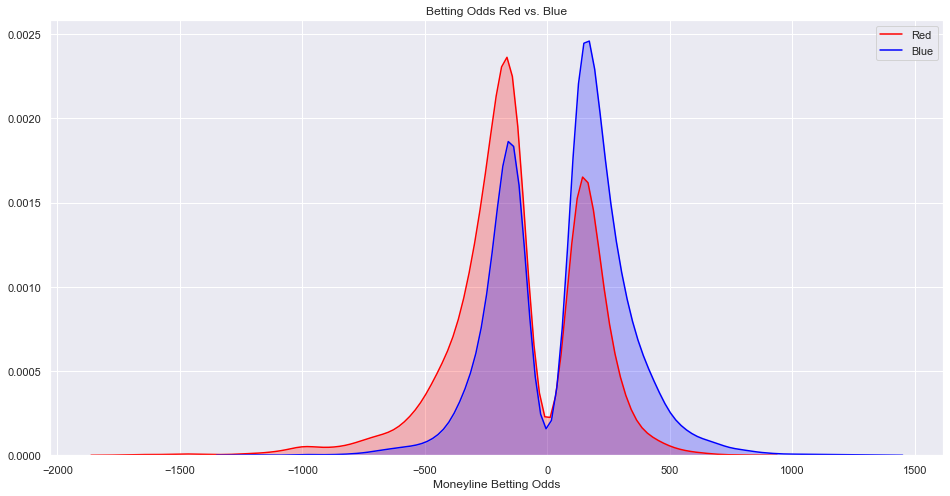

In [130]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.kdeplot(odds.R_odds, shade=True, color='red', label='Red')
sns.kdeplot(odds.B_odds, shade=True, color='blue', label='Blue')
plt.xlabel('Moneyline Betting Odds')
plt.ylabel('')
plt.title('Betting Odds Red vs. Blue')

plt.show()

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



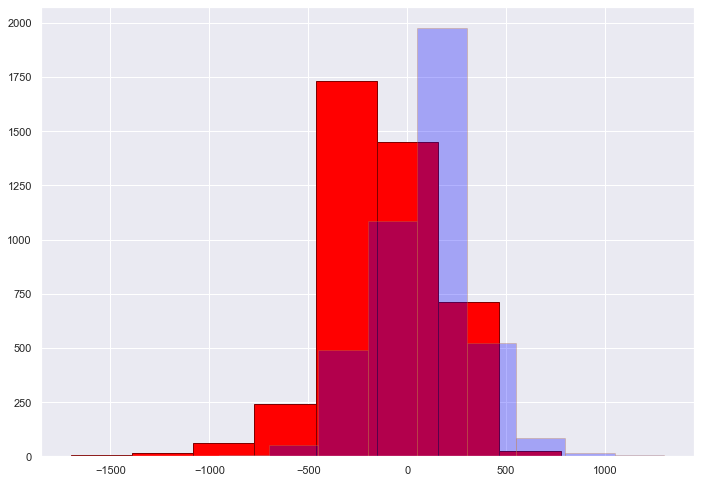

In [131]:
plt.hist(odds['R_odds'],
        facecolor='red',
        edgecolor='maroon',
        bins=8)
plt.hist(odds['B_odds'],
        facecolor='blue',
        edgecolor='peru',
        bins=10,
        alpha = 0.3)
plt.show()

In [134]:
# fig = px.histogram(odds, x="R_odds")
# fig1 = px.histogram(odds, x="B_odds")
# fig.show()
# fig1.show()

### Looking at the betting data to see how often the favorite wins over the underdog

In [132]:
betting_data['underdog'] = ''

red_underdog_mask = betting_data['R_odds'] > betting_data['B_odds']
#print(red_underdog_mask)
#print()

blue_underdog_mask = betting_data['B_odds'] > betting_data['R_odds']
#print(blue_underdog_mask)
#print()

even_mask = (betting_data['B_odds'] == betting_data['R_odds'])
#print(even_mask)
#print()

betting_data['underdog'][red_underdog_mask] = 'Red'
betting_data['underdog'][blue_underdog_mask] = 'Blue'
betting_data['underdog'][even_mask] = 'Even'

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
df_no_even = betting_data[betting_data['underdog'] != 'Even']
df_no_even = df_no_even[df_no_even['Winner'] != 'Draw']
print(f"Number of fights including even fights and draws: {len(betting_data)}")
print(f"Number of fights with even fights and draws removed: {len(df_no_even)}")

Number of fights including even fights and draws: 5528
Number of fights with even fights and draws removed: 5376


([<matplotlib.patches.Wedge at 0x2205dc6a788>,
 [Text(-0.7477187491542621, 0.8067940704809288, 'Favorites'),
  Text(0.7477188246917706, -0.806794000474444, 'Underdogs')],
 [Text(-0.40784659044777927, 0.44006949298959747, '73.8%'),
  Text(0.4078466316500567, -0.44006945480424214, '26.2%')])

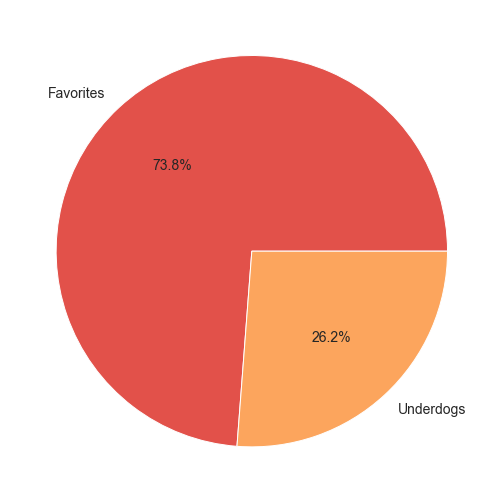

In [134]:
sns.set_palette("Spectral") 
number_of_fights = len(df_no_even)
number_of_upsets = len(df_no_even[df_no_even['Winner'] == df_no_even['underdog']])
number_of_favorites = len(df_no_even[df_no_even['Winner'] != df_no_even['underdog']])
#print(number_of_upsets)
#print(number_of_fights)
#print(number_of_favorites)
upset_percent = (number_of_upsets / number_of_fights) * 100
favorite_percent = (number_of_favorites / number_of_fights) * 100
#print(upset_percent)
#print(favorite_percent)
labels = 'Favorites', 'Underdogs'
sizes = [favorite_percent, upset_percent]
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})